In [1]:
from pathlib import Path
notebook_path = Path().cwd().parent.parent.parent.parent
import sys; sys.path.insert(0, str(notebook_path))

import pandas as pd
import matplotlib.pyplot as plt

# Custom imports
from explore.gcp.storage import gcp
from explore.src.utilities.eda_funcs import describe_data
from explore.src.data.valuations_dfs import TeamValues
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.valuations_visual import TeamValsPlots

pd.set_option('display.max_columns', None)

In [2]:
# read in serie a team data
df = gcp.read_df_from_bucket(bucket_name='processed_transfermarkt_db', blob_name='processed_serie_a_team_data.csv')

[03/21/24 18:21:07] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=212109;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=829758;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=452223;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=765703;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()


,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season,team_season,foreigner_pct
0,506,Juventus FC,juventus-turin,33,26.6,17,19.79,653.15,2017,Juventus FC - 2017,51.52
1,6195,SSC Napoli,ssc-neapel,40,25.2,24,12.61,504.25,2017,SSC Napoli - 2017,60.00
2,46,Inter Milan,inter-mailand,34,25.9,22,14.33,487.28,2017,Inter Milan - 2017,64.71
3,12,AS Roma,as-rom,47,23.7,26,9.98,469.10,2017,AS Roma - 2017,55.32
4,398,SS Lazio,lazio-rom,44,24.8,28,9.29,408.78,2017,SS Lazio - 2017,63.64


In [4]:
df.shape


(140, 11)

In [5]:
TeamValues(df).pipeline()


,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season,team_season,foreigner_pct
0,506,Juventus FC,juventus-turin,33,26.6,17,19.79,653.15,2017,Juventus FC - 2017,51.52
1,6195,SSC Napoli,ssc-neapel,40,25.2,24,12.61,504.25,2017,SSC Napoli - 2017,60.00
2,46,Inter Milan,inter-mailand,34,25.9,22,14.33,487.28,2017,Inter Milan - 2017,64.71
3,12,AS Roma,as-rom,47,23.7,26,9.98,469.10,2017,AS Roma - 2017,55.32
4,398,SS Lazio,lazio-rom,44,24.8,28,9.29,408.78,2017,SS Lazio - 2017,63.64
...,...,...,...,...,...,...,...,...,...,...,...
135,380,US Salernitana 1919,us-salernitana-1919,29,26.2,22,3.08,89.30,2023,US Salernitana 1919 - 2023,75.86
136,1005,US Lecce,us-lecce,31,23.5,23,2.84,88.03,2023,US Lecce - 2023,74.19
137,749,FC Empoli,fc-empoli,29,25.5,12,2.89,83.80,2023,FC Empoli - 2023,41.38
138,1390,Cagliari Calcio,cagliari-calcio,30,27.1,14,2.57,76.98,2023,Cagliari Calcio - 2023,46.67


In [6]:
describe_data(df)


,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
team_id,int64,0,0.0,30,5.000,8970.00,506.00,1475.74,2114.99,28,20.00
squad_size,int64,0,0.0,36,25.000,88.00,41.00,41.50,9.84,6,4.29
squad_avg_age,float64,0,0.0,40,22.700,28.40,25.10,25.20,1.01,1,0.71
squad_foreigners,int64,0,0.0,28,7.000,41.00,22.00,22.22,5.83,1,0.71
average_value_euro_mill,float64,0,0.0,136,0.804,23.47,4.16,6.62,5.21,4,2.86
total_value_euro_mill,float64,0,0.0,140,47.880,871.05,187.02,257.36,186.20,1,0.71
season,int64,0,0.0,7,2017.000,2023.00,2020.00,2020.00,2.01,0,0.00
foreigner_pct,float64,0,0.0,114,17.950,86.11,55.16,54.63,12.68,1,0.71


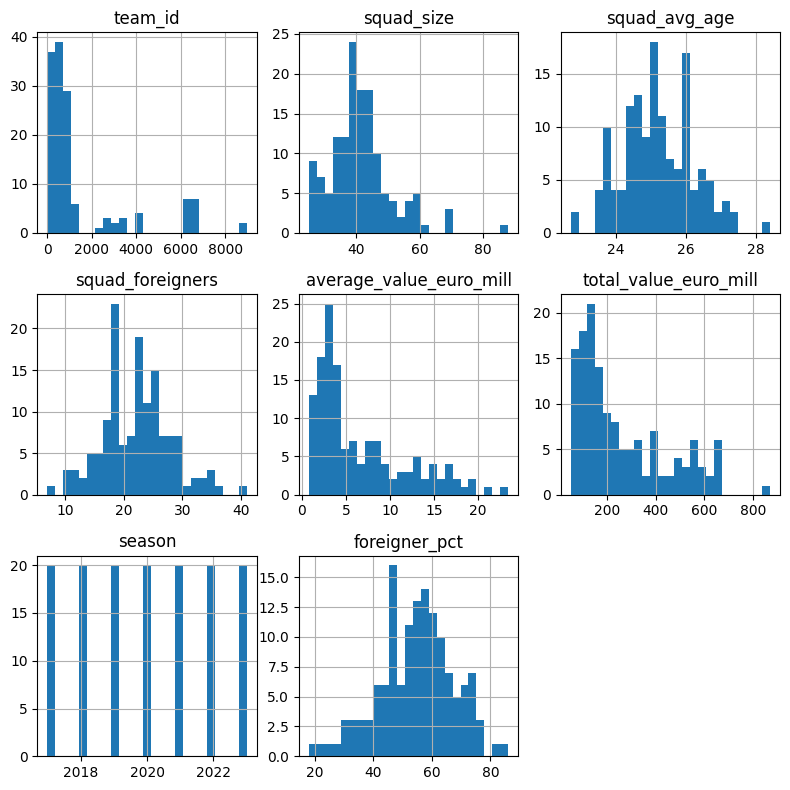

In [7]:
df.hist(bins=25, figsize=(8, 8))
plt.tight_layout()
plt.show()

Statistical plot

In [8]:
stat_plots = StatisticPlots(df)

In [9]:
cols = df.select_dtypes(include='number').columns[1:]

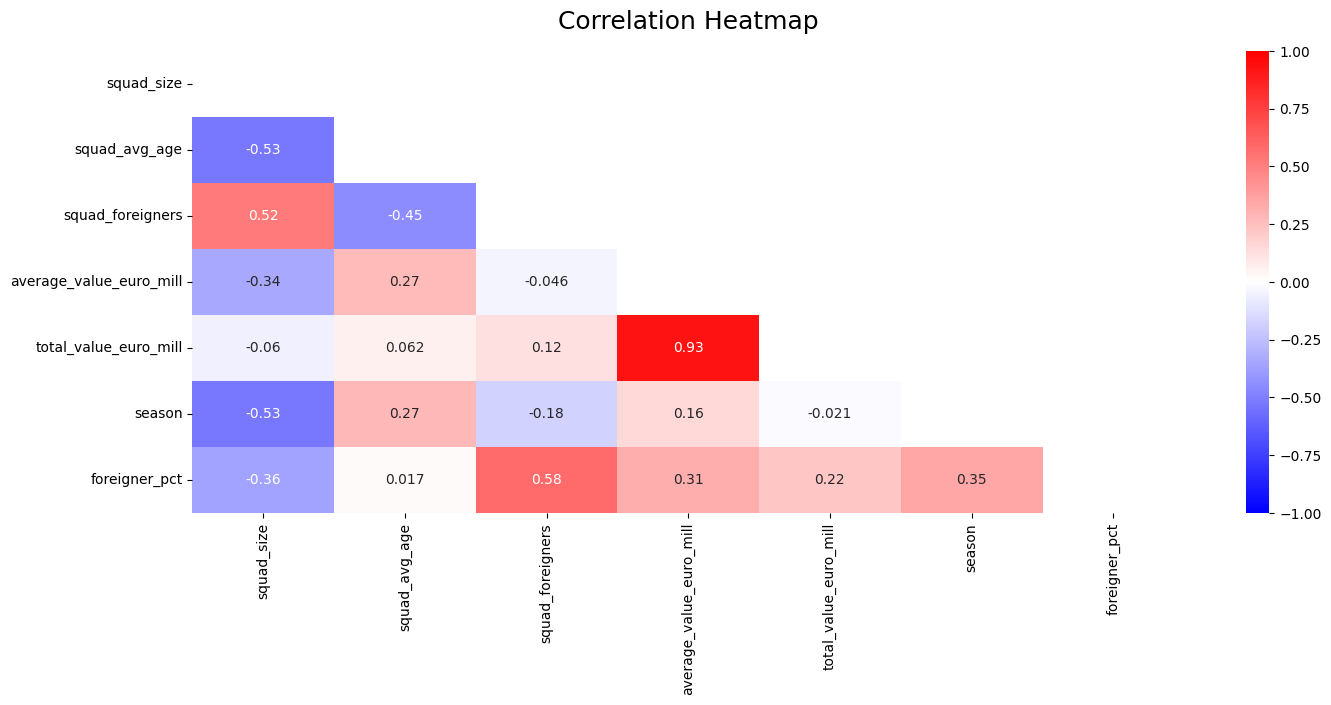

In [10]:
stat_plots.correlation_matrix(vars=cols)


Relationship between total market value and other variables

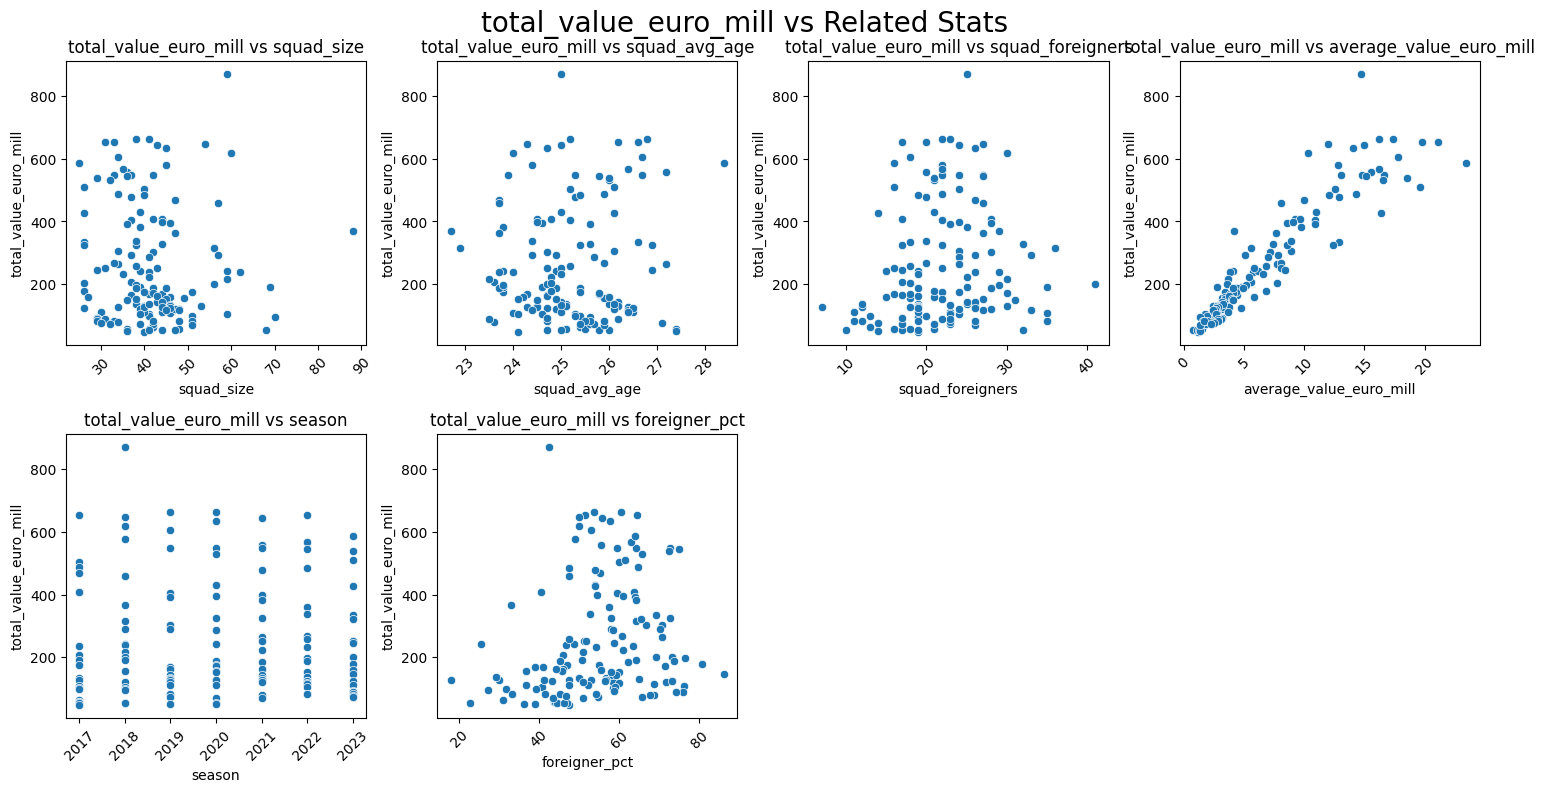

In [11]:
stat_plots.relationships(y='total_value_euro_mill', X=cols)

Relationships between season and each variable

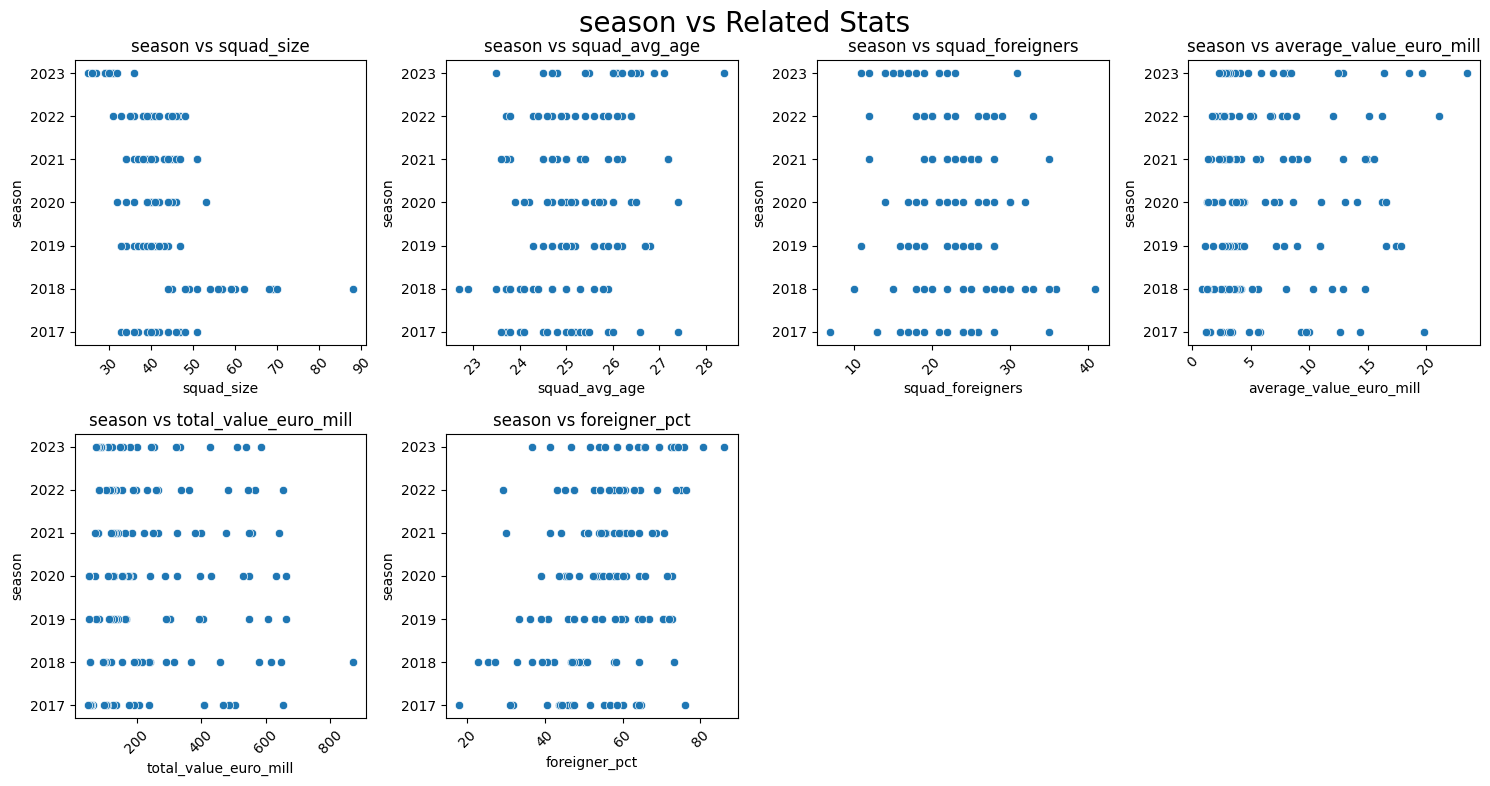

In [12]:
stat_plots.relationships(y='season', X=cols)

In [13]:
plots = TeamValsPlots(df)

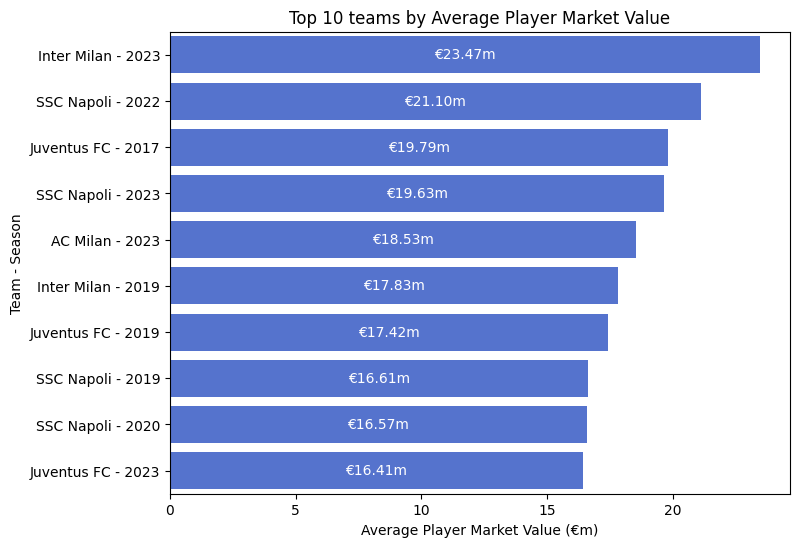

In [14]:
plots.top_10_plot('average_value_euro_mill')
plt.xlabel("Average Player Market Value (€m)")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Average Player Market Value")
plt.show()

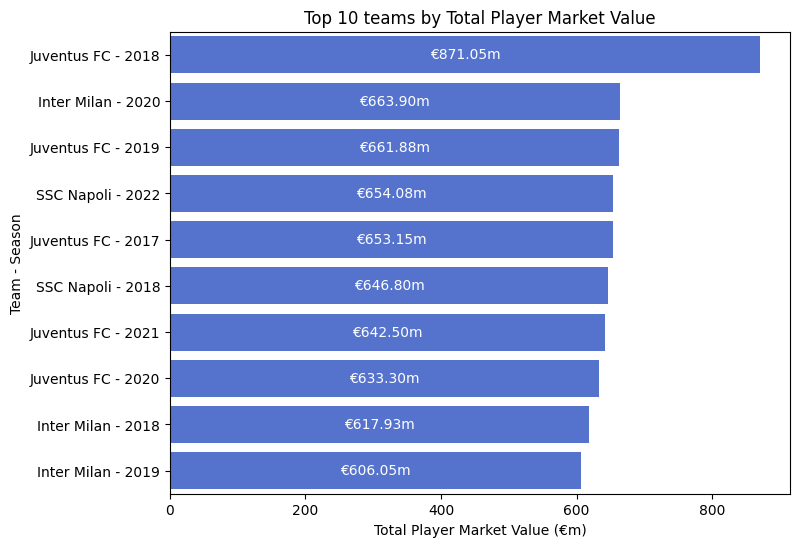

In [15]:
plots.top_10_plot('total_value_euro_mill')
plt.xlabel("Total Player Market Value (€m)")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Total Player Market Value")
plt.show()

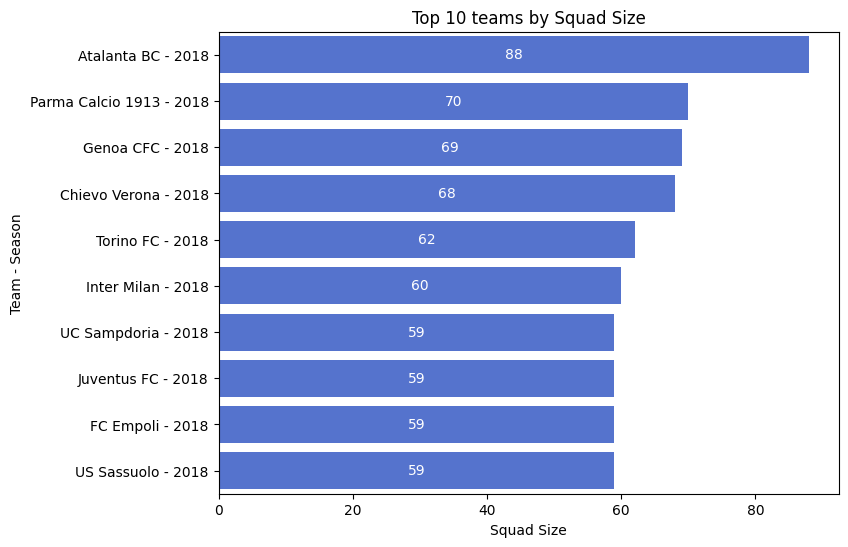

In [16]:
plots.top_10_plot("squad_size")
plt.xlabel("Squad Size")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Squad Size")
plt.show()

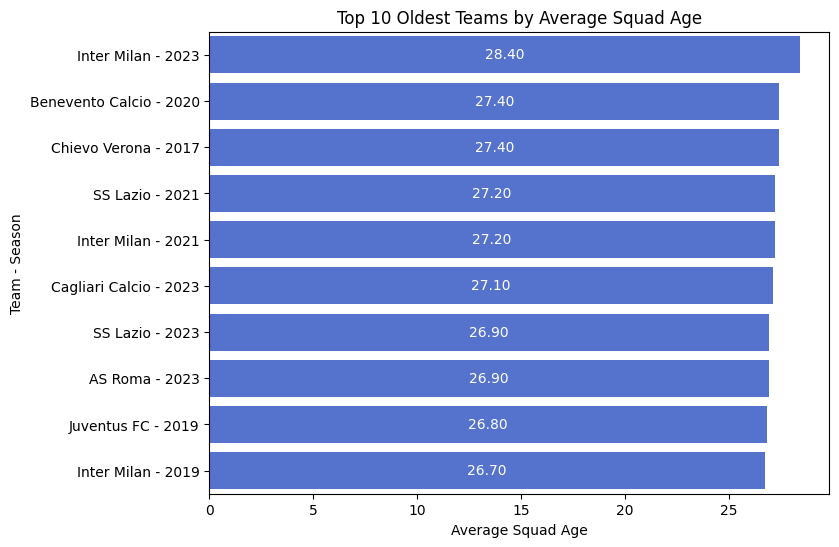

In [17]:
plots.top_10_plot("squad_avg_age")
plt.xlabel("Average Squad Age")
plt.ylabel("Team - Season")
plt.title("Top 10 Oldest Teams by Average Squad Age")
plt.show()

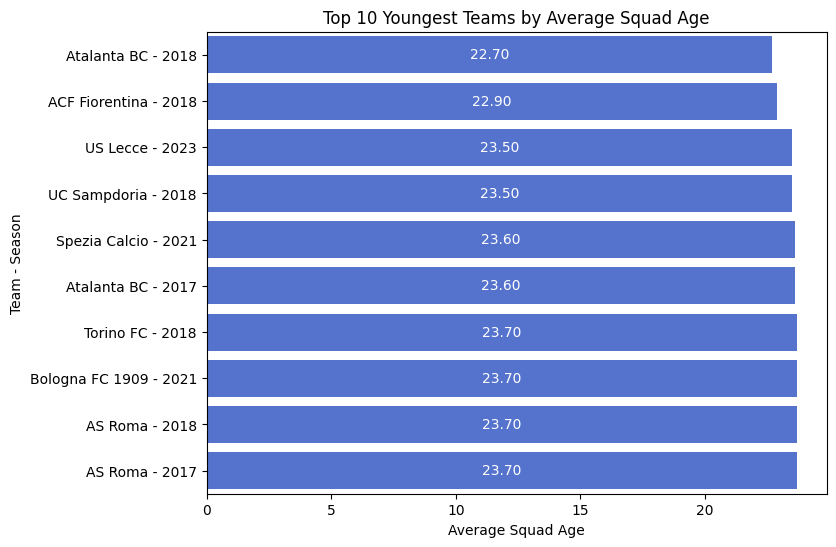

In [18]:
plots.top_10_plot("squad_avg_age", ascend=True)
plt.xlabel("Average Squad Age")
plt.ylabel("Team - Season")
plt.title("Top 10 Youngest Teams by Average Squad Age")
plt.show()

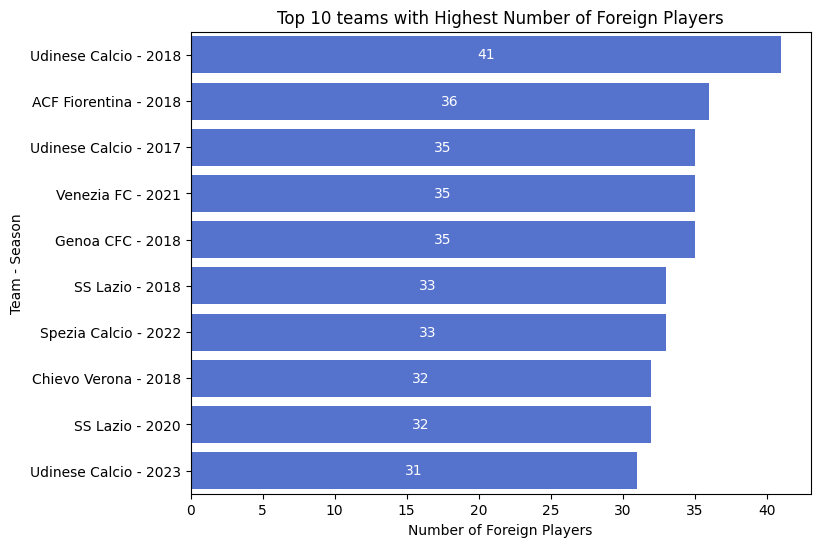

In [19]:
plots.top_10_plot("squad_foreigners")
plt.xlabel("Number of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Highest Number of Foreign Players")
plt.show()

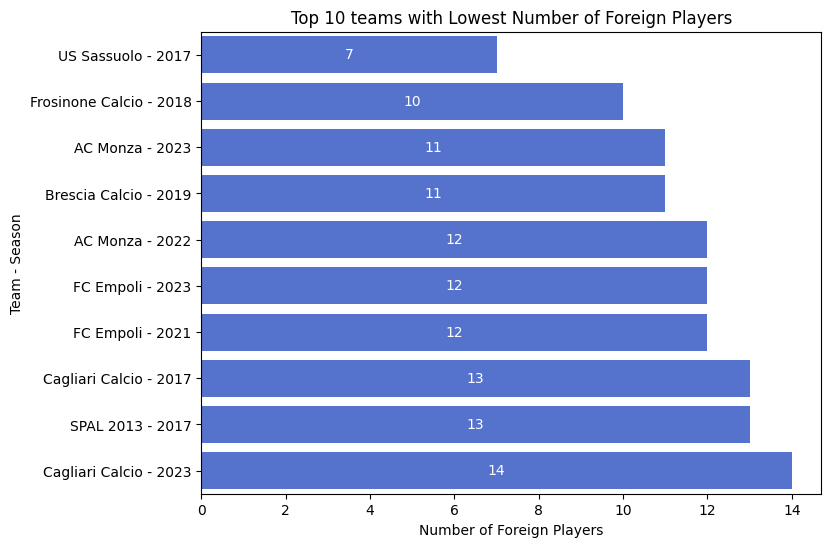

In [20]:
plots.top_10_plot("squad_foreigners", ascend=True)
plt.xlabel("Number of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Lowest Number of Foreign Players")
plt.show()

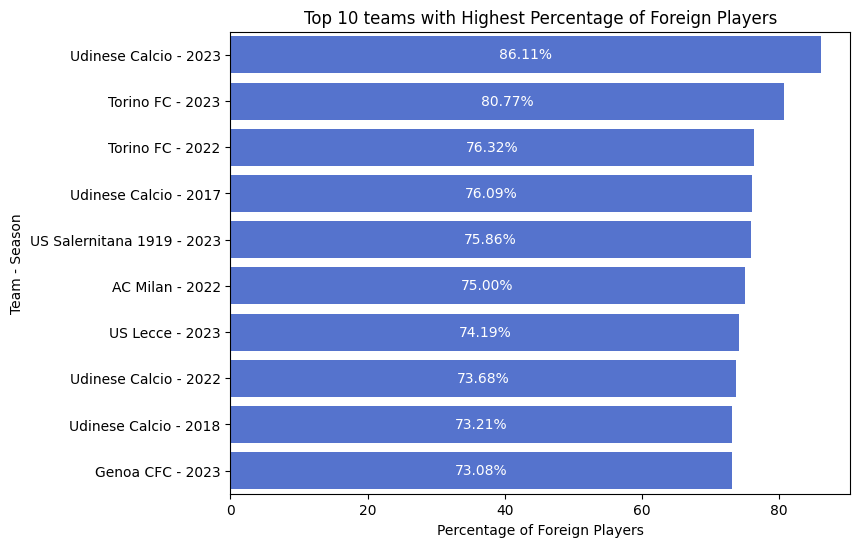

In [21]:
plots.top_10_plot("foreigner_pct")
plt.xlabel("Percentage of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Highest Percentage of Foreign Players")
plt.show()

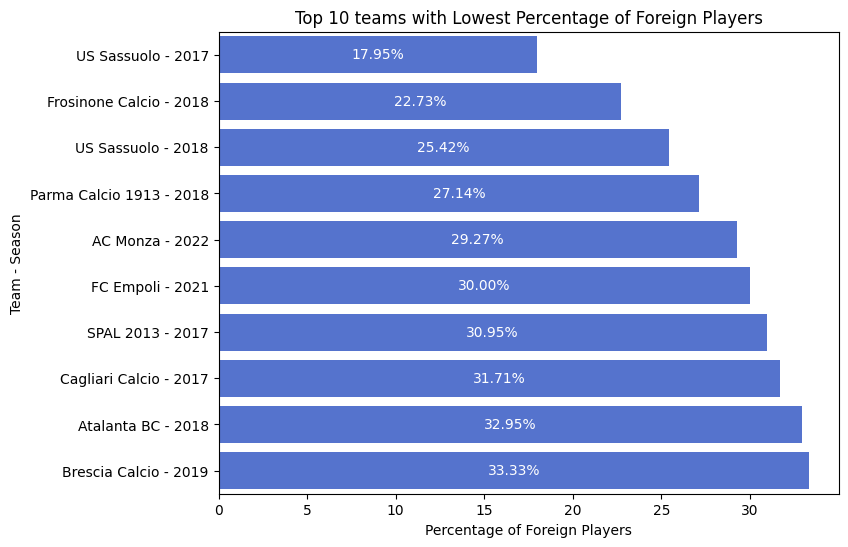

In [22]:
plots.top_10_plot("foreigner_pct", ascend=True)
plt.xlabel("Percentage of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Lowest Percentage of Foreign Players")
plt.show()

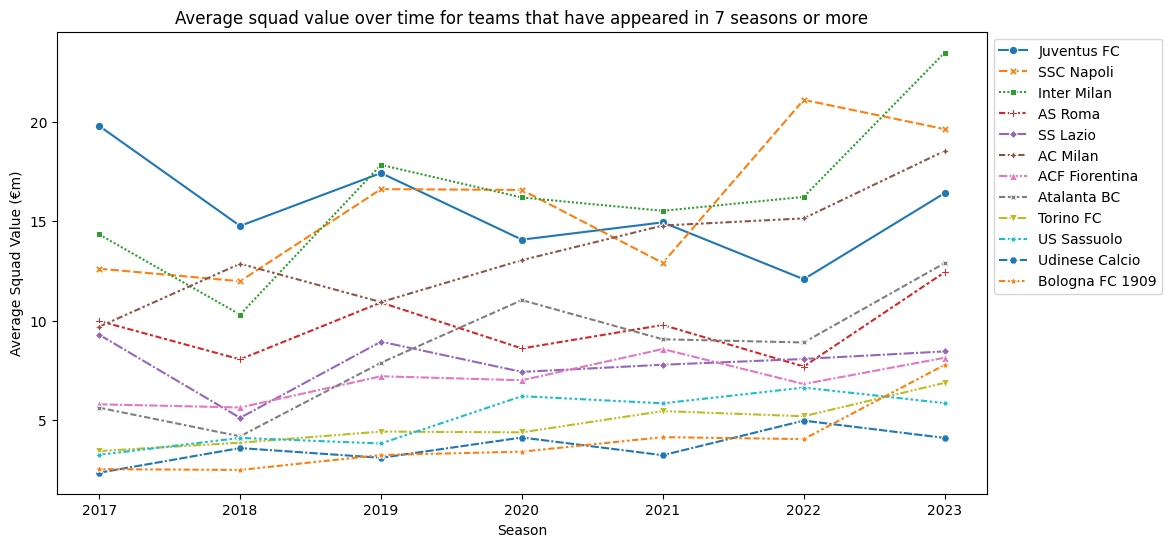

In [23]:
plots.time_series_plot(column='average_value_euro_mill', seasons=7)
plt.show()

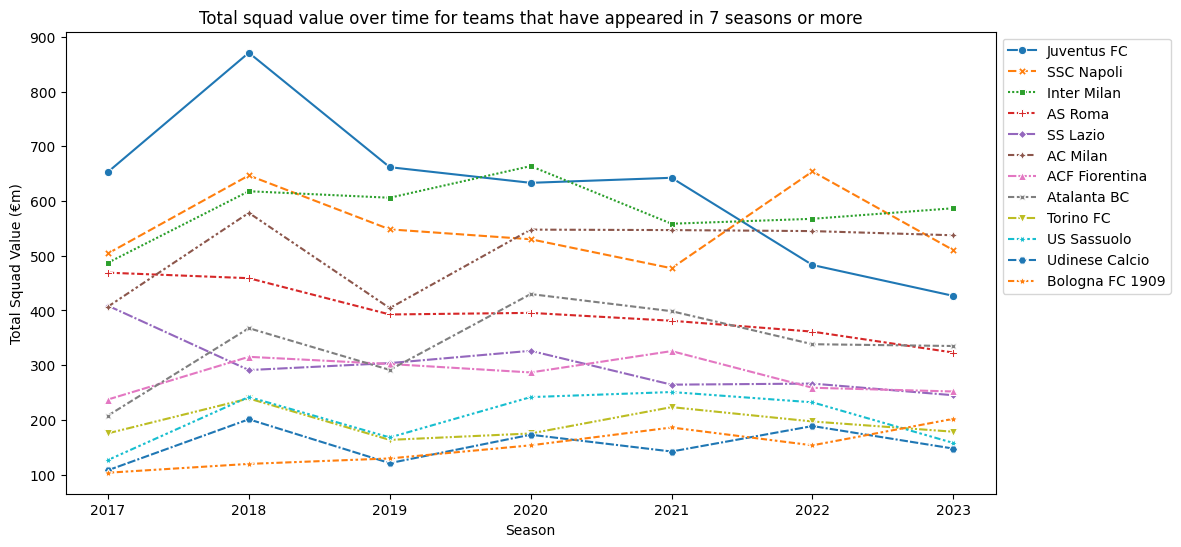

In [24]:
plots.time_series_plot(column='total_value_euro_mill', seasons=7)
plt.show()